<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agregamos las librerías que se utilizarán

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Realizamos nuestra función pendiente que llamaremos mas tarde

In [61]:
ymin=-5  #valor minimo de tension
ymax=5  #valor maximo de tension
def pendiente(x,ymin,ymax):
  xmax=max(x)
  xmin=min(x)
  m=(ymax-ymin)/(xmax-xmin) #pendiente
  c=ymin-m*xmin #intercepto
  y=m*x+c #señal generada
  return y

Creamos la señal mostrando al menos 2 períodos de la misma, periodo hallado en el punto 2 del parcial a mano (2pi)

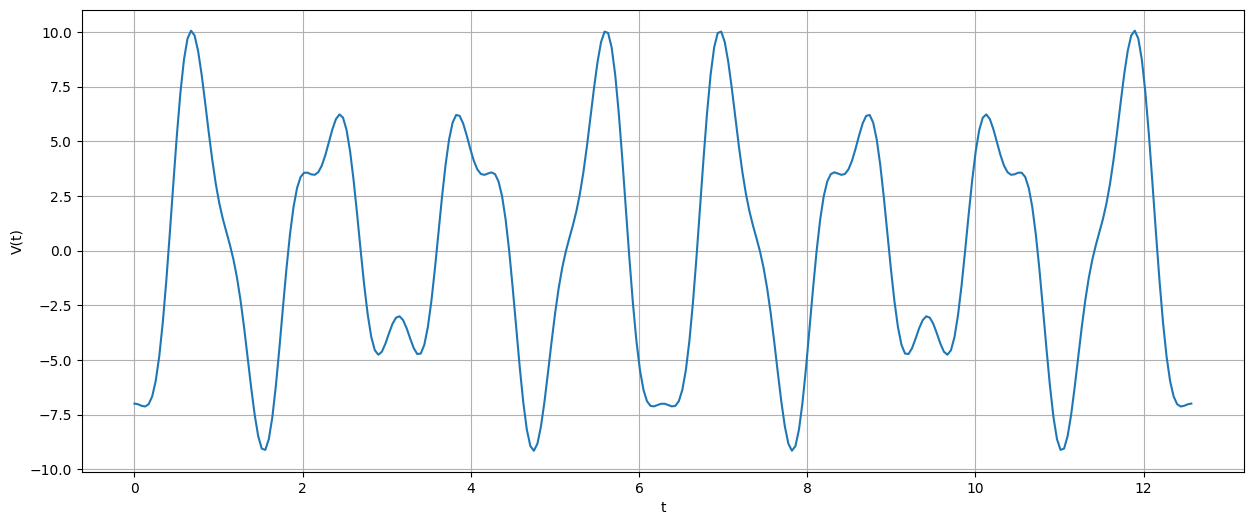

In [62]:
ti=0
tf=4*np.pi
vt = np.linspace(ti,tf,num=300)  #300 son las muestras tomadas en nuestro vector de tiempo
x = 7*np.sin(4*vt-(np.pi/2))-2*np.cos(5*vt)+2*np.cos(10*vt) #todas las señales están juntas
plt.figure(figsize=(15,6))  #Ampliamos un poco la imagen
plt.plot(vt,x)
plt.xlabel('t')
plt.ylabel('V(t)')
plt.grid()

Llamamos el bloque de la pendiente para obtener una señal limitada en la tensión, y de paso mostramos su discretización

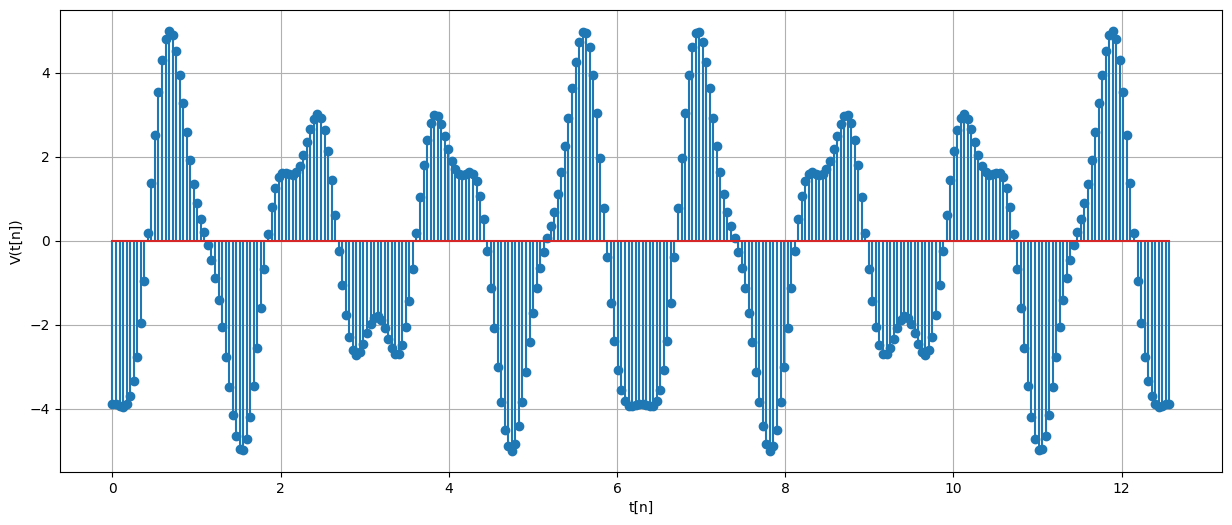

In [63]:
x2 = pendiente(x,ymin,ymax)
plt.figure(figsize=(15,6))
plt.stem(vt,x2)
plt.xlabel('t[n]')
plt.ylabel('V(t[n])')
plt.grid()

Empezamos el proceso de cuantización, con valores mínimo y máximo y el número de bits para crear los estados, y a su vez hallar la distancia entre la señal discretizada y los estados.

In [64]:
nbits=3
rmin=-5
rmax=5
ve=np.linspace(rmin,rmax,2**nbits)
d=cdist(x2.reshape(-1,1),ve.reshape(-1,1))
ind=np.argmin(d,axis=1)

Definimos nuestro cuantizador, que va a tomar un valor de la señal y buscará el estado mas cercano a el a través de toda una columna.

In [65]:
def cuantizador(x3,ve2):
  Ne=ve2.shape[0]
  dn=cdist(x3.reshape(-1,1),ve2.reshape(-1,1))
  ind=np.argmin(dn)
  return ve2[ind]

Este ciclo atraviesa los puntos de la señal en cada columna y los ubica respecto al estado mas cercano

In [66]:
for i in range(x2.shape[0]):
  if i==0:
    x3=cuantizador(x2[i],ve)
  else:
    x3=np.append(x3,cuantizador(x2[i],ve))

Por último, graficamos y comparamos todas las señales de esta función.
El ciclo en medio se encarga de pintar cada uno de los estados, np.ones se encarga de hacerlo constante.

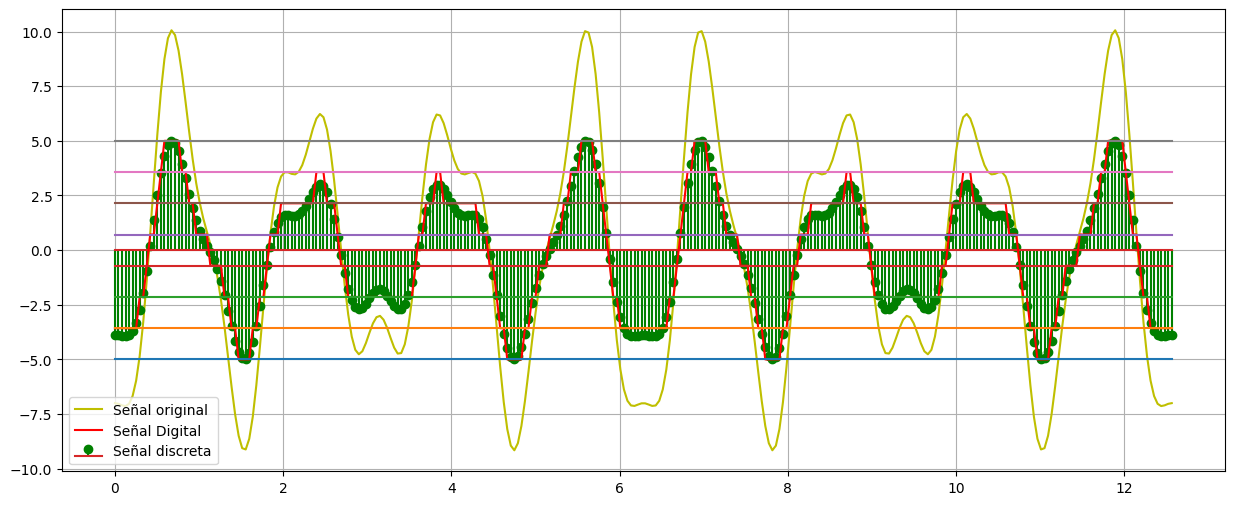

In [67]:
plt.figure(figsize=(15,6))
plt.plot(vt,x,c='y',label='Señal original')
plt.stem(vt,x2,linefmt='g',label='Señal discreta')
plt.plot(vt,x3,c='r',label='Señal Digital')

for v in ve:
  plt.plot(vt,v*np.ones(len(vt)))

plt.legend()
plt.grid()